In [9]:
from portfawn.portfolio.portfolio import Portfolio, PortfolioParams
from portfawn.plot.portfolio import PlotPortfolio

%matplotlib inline

In [11]:
## Parameters
# market data

tickers = {"S&P 500": "IVV", 
           "Small-Cap": "IJR",
           'ACWI ex U.S.': 'ACWX',
           "Emerging Markets": "IEMG", 
           "Global REIT": "REET", 
           'U.S. Real Estate': 'IYR',
           'Aggregate Bond': 'AGG',
           'Gold': 'GLD',
           'Corporate Bond ': 'HYG'
          }

asset_list = list(tickers.values())

# date
date_start = "2015-01-01"
date_end = "2020-12-31"

# portfolio
objective = "EWP"
risk_free_rate = 0.00
sampling_params = {"type": "standard"}
target_return=0.2
target_sd=0.05
weight_bound = (0.02, 0.98)

In [6]:
portfolio_params = PortfolioParams(name="test_ewp", objective=objective, 
                                   target_return=target_return,
                                   target_sd=target_sd,
                                   weight_bound=weight_bound)

In [7]:
portfolio = Portfolio(portfolio_params)

In [12]:
performance = portfolio.run(asset_list=asset_list, date_start=date_start, date_end=date_end)

[*********************100%***********************]  9 of 9 completed


/mnt/c/Users/M/Desktop/projects/PortFawn/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
plot_portfolio = PlotPortfolio(performance)

## Portfolio Returns

In [15]:
performance['portfolio_returns'].head(3)

,EWP
Date,
2014-07-11,0.001050
2014-07-14,0.000856
2014-07-15,-0.003331


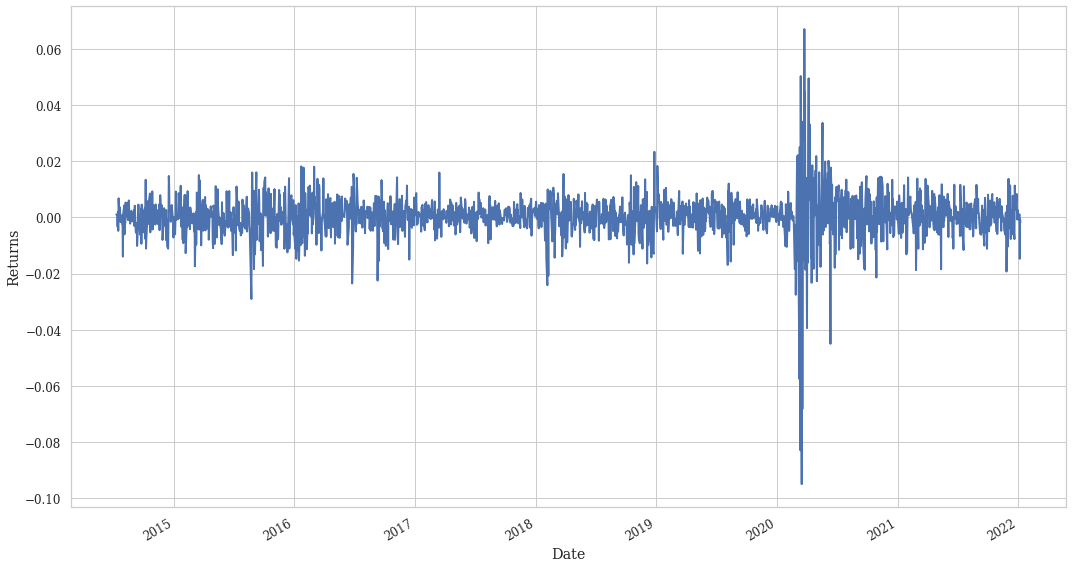

In [16]:
fig, ax = plot_portfolio.plot_returns()

## Portfolio cumulative Returns

In [18]:
performance['portfolio_cum_returns'].head(3)

,EWP
Date,
2014-07-11,0.001050
2014-07-14,0.001907
2014-07-15,-0.001430


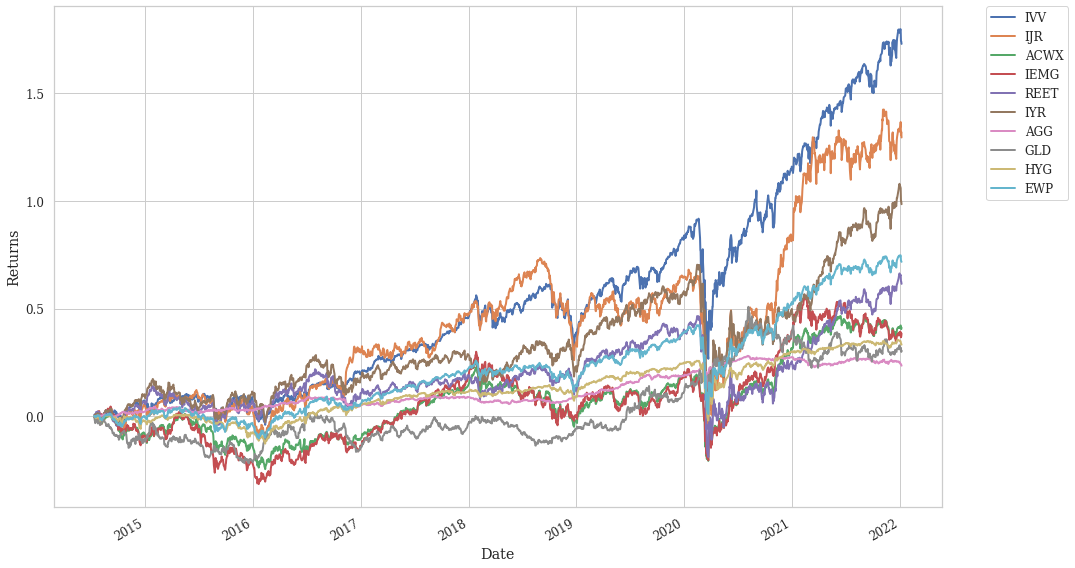

In [17]:
fig, ax = plot_portfolio.plot_cum_returns()

## Distributions of Portfolio Returns

In [20]:
performance['portfolio_assets_returns'].describe()

,IVV,IJR,ACWX,IEMG,REET,IYR,AGG,GLD,HYG,EWP
count,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,0.000594,0.000538,0.000244,0.000258,0.000324,0.000442,0.000116,0.000180,0.000166,0.000318
std,0.011113,0.013988,0.011035,0.013015,0.011698,0.012482,0.002685,0.008880,0.005230,0.007910
min,-0.115743,-0.117687,-0.111250,-0.126741,-0.166592,-0.168700,-0.040011,-0.053694,-0.054966,-0.094962
25%,-0.003201,-0.005935,-0.004560,-0.006494,-0.004275,-0.004741,-0.001103,-0.004594,-0.001670,-0.002888
50%,0.000661,0.000885,0.000664,0.000638,0.000772,0.001013,0.000180,0.000394,0.000329,0.000597
75%,0.005454,0.007449,0.005949,0.007630,0.005642,0.006252,0.001389,0.004753,0.002062,0.003947
max,0.094503,0.086948,0.083842,0.072336,0.087610,0.085328,0.023721,0.049038,0.065459,0.067034


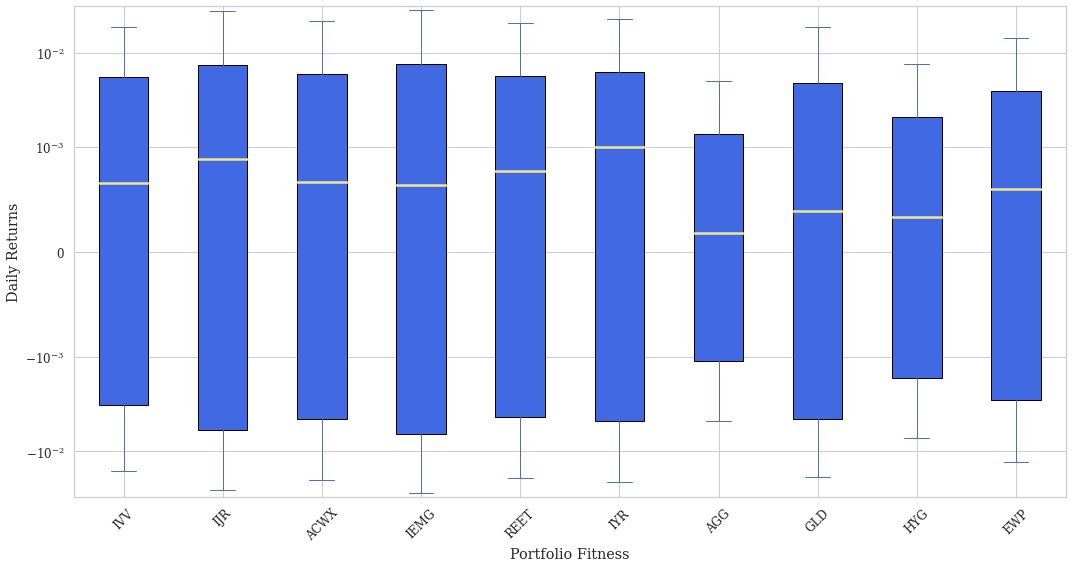

In [19]:
fig, ax = plot_portfolio.plot_dist_returns()

## Relationships of Returns

In [22]:
# Cov Data
performance['portfolio_assets_returns'].cov()

,IVV,IJR,ACWX,IEMG,REET,IYR,AGG,GLD,HYG,EWP
IVV,1.235037e-04,1.315819e-04,0.000108,0.000114,0.000097,0.000105,-5.035491e-07,-7.161553e-07,0.000045,0.000080
IJR,1.315819e-04,1.956554e-04,0.000121,0.000125,0.000120,0.000124,-6.788348e-07,-3.254177e-06,0.000052,0.000096
ACWX,1.075773e-04,1.212997e-04,0.000122,0.000132,0.000093,0.000092,1.004858e-06,6.694864e-06,0.000043,0.000080
IEMG,1.142117e-04,1.245022e-04,0.000132,0.000169,0.000096,0.000095,1.235304e-06,1.022866e-05,0.000046,0.000088
REET,9.655116e-05,1.199561e-04,0.000093,0.000096,0.000137,0.000138,5.588435e-06,1.170165e-05,0.000043,0.000082
IYR,1.049180e-04,1.235987e-04,0.000092,0.000095,0.000138,0.000156,5.773334e-06,9.984886e-06,0.000045,0.000086
AGG,-5.035491e-07,-6.788348e-07,0.000001,0.000001,0.000006,0.000006,7.209373e-06,8.290559e-06,0.000002,0.000003
GLD,-7.161553e-07,-3.254177e-06,0.000007,0.000010,0.000012,0.000010,8.290559e-06,7.886019e-05,0.000003,0.000014
HYG,4.484698e-05,5.178316e-05,0.000043,0.000046,0.000043,0.000045,1.879044e-06,2.752000e-06,0.000027,0.000034
EWP,8.021901e-05,9.604935e-05,0.000080,0.000088,0.000082,0.000086,3.310947e-06,1.383805e-05,0.000034,0.000063


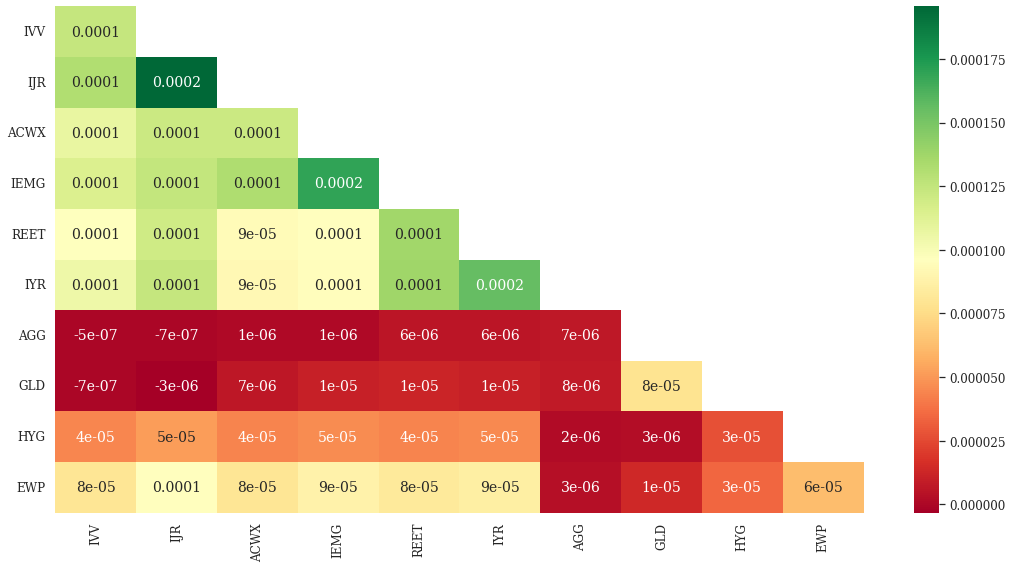

In [21]:
# Cov plot
fig, ax = plot_portfolio.plot_cov()

In [23]:
# Corr Data
performance['portfolio_assets_returns'].corr()

,IVV,IJR,ACWX,IEMG,REET,IYR,AGG,GLD,HYG,EWP
IVV,1.000000,0.846467,0.877204,0.789608,0.742700,0.756353,-0.016875,-0.007257,0.771554,0.912532
IJR,0.846467,1.000000,0.785839,0.683868,0.733116,0.707918,-0.018075,-0.026198,0.707809,0.868079
ACWX,0.877204,0.785839,1.000000,0.921976,0.721915,0.669996,0.033914,0.068318,0.751657,0.916010
IEMG,0.789608,0.683868,0.921976,1.000000,0.628482,0.585356,0.035348,0.088497,0.680328,0.851610
REET,0.742700,0.733116,0.721915,0.628482,1.000000,0.944526,0.177925,0.112646,0.709112,0.889554
IYR,0.756353,0.707918,0.669996,0.585356,0.944526,1.000000,0.172263,0.090080,0.696478,0.867457
AGG,-0.016875,-0.018075,0.033914,0.035348,0.177925,0.172263,1.000000,0.347701,0.133802,0.155889
GLD,-0.007257,-0.026198,0.068318,0.088497,0.112646,0.090080,0.347701,1.000000,0.059251,0.196996
HYG,0.771554,0.707809,0.751657,0.680328,0.709112,0.696478,0.133802,0.059251,1.000000,0.824934
EWP,0.912532,0.868079,0.916010,0.851610,0.889554,0.867457,0.155889,0.196996,0.824934,1.000000


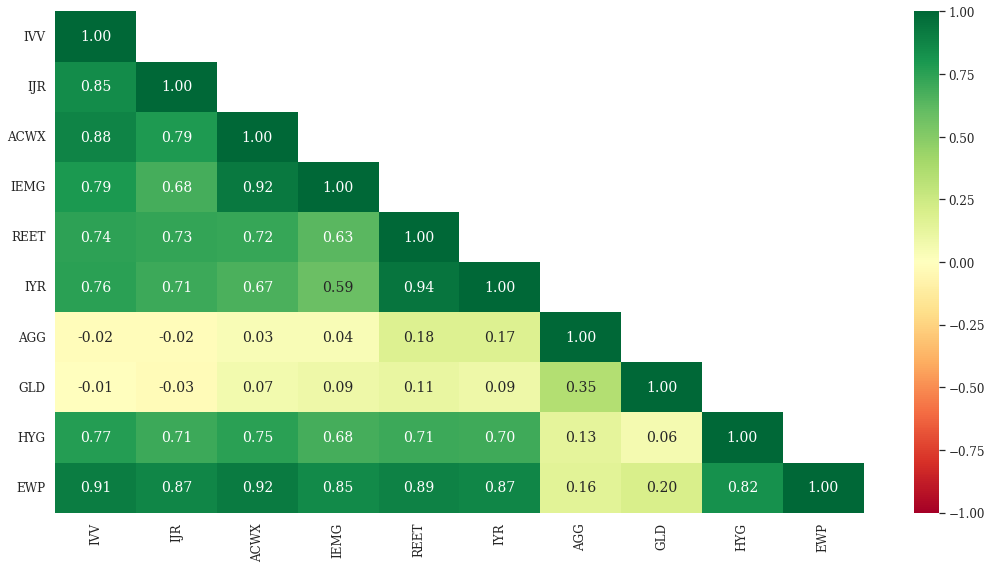

In [24]:
# Corr plot
fig, ax = plot_portfolio.plot_corr()

## Expected Returns vs. Volatility

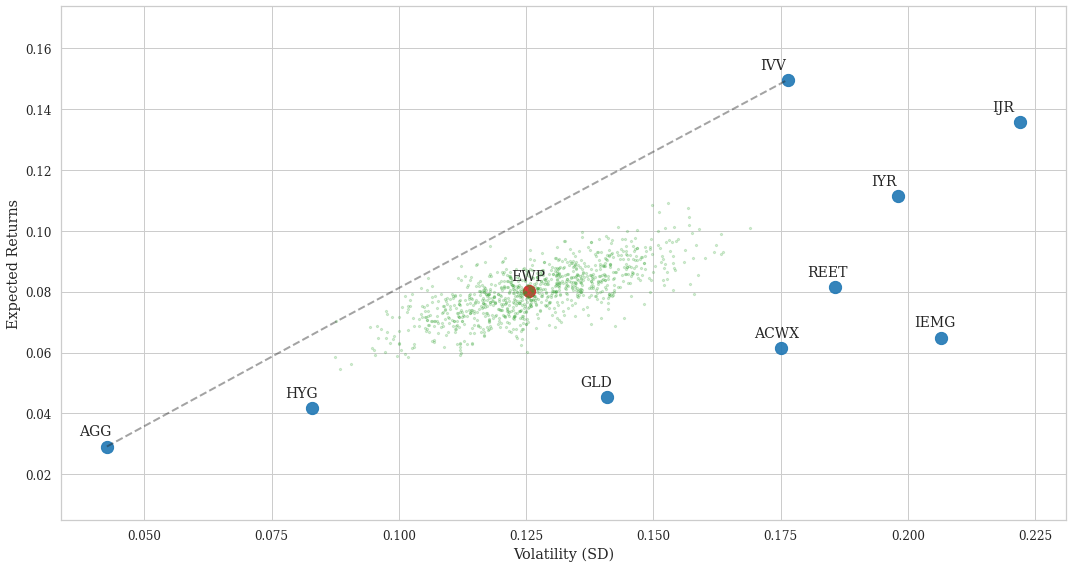

In [25]:
fig, ax = plot_portfolio.plot_mean_sd()